<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


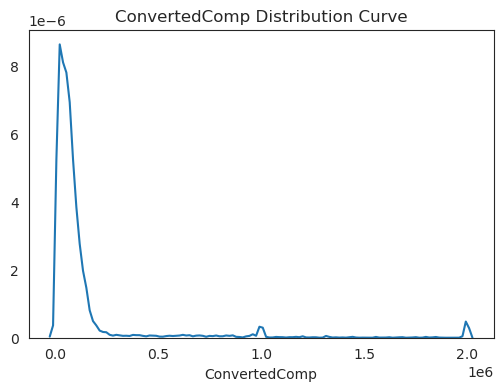

In [3]:
# Plotting the distribution curve for the ConvertedComp column 
sns.set_style(style="white")
plt.figure(figsize=(6,4))
sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist=False, kde=True)
plt.title("ConvertedComp Distribution Curve")
plt.show() 

Plot the histogram for the column `ConvertedComp`.


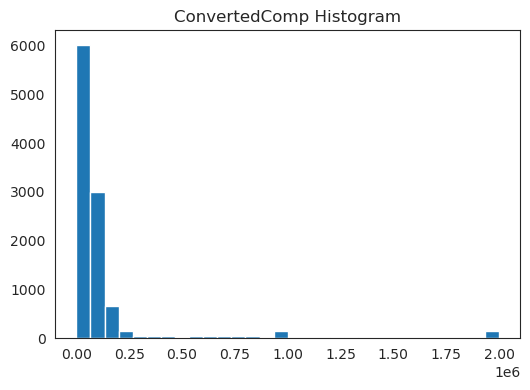

In [4]:
# Plotting the histogram for the ConvertedComp column 
plt.figure(figsize=(6,4))
plt.hist(df['ConvertedComp'], bins=30)
plt.title("ConvertedComp Histogram")
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
# Computing the median of the ConvertedComp column 
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [6]:
# Determining the number of responders based on the Gender column 
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [7]:
# Determining the number of responders based on the Gender column with value equal to 'Man'
df['Gender'].eq('Man').sum()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# Computing the median of the ConvertedComp column based on the Gender column with value equal to 'Woman'
df[df['Gender'].eq('Woman')]['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# Determining the five number summary for the Age column
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


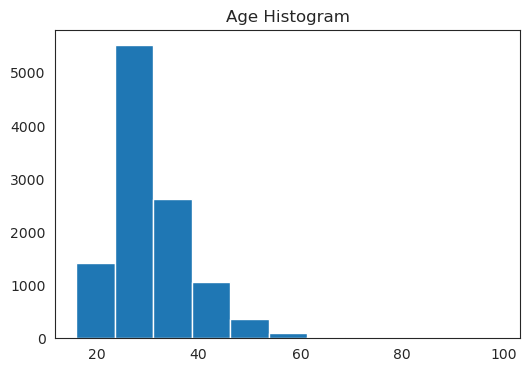

In [10]:
# Plotting the histogram for the Age column 
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=11)
plt.title("Age Histogram")
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


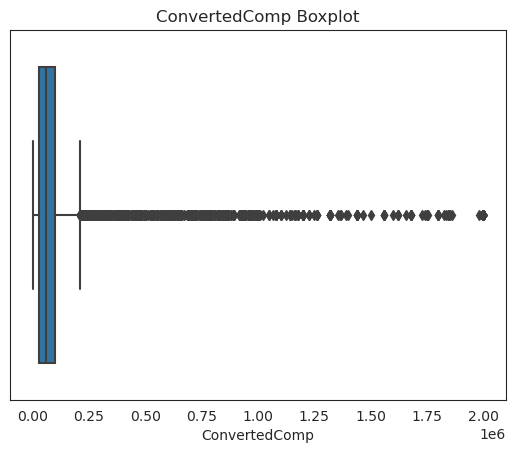

In [11]:
# Plotting the boxplot for the ConvertedComp column 
sns.set_style(style="white")
sns.boxplot(x=df["ConvertedComp"])
plt.title("ConvertedComp Boxplot")
plt.show() 

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# Determining the boxplot first quartile, third quartile and interquartile range for the ConvertedComp column
quartile_1 = df['ConvertedComp'].quantile(0.25)
quartile_3 = df['ConvertedComp'].quantile(0.75)
interquartile_range = quartile_3 - quartile_1
print(interquartile_range)

73132.0


Find out the upper and lower bounds.


In [13]:
# Determining the boxplot upper and lower bounds for the ConvertedComp column
lower_bound = quartile_1 - (1.5*interquartile_range)
upper_bound = quartile_3 + (1.5*interquartile_range)
print(lower_bound, upper_bound)

-82830.0 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
# Determining the number of outliers beyond the upper and lower bounds for the ConvertedComp column
outlier = (df['ConvertedComp']<lower_bound) | (df['ConvertedComp']>upper_bound)
outlier.value_counts()

False    10519
True       879
Name: ConvertedComp, dtype: int64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [15]:
# Formulating a dataframe without the outliers beyond the upper and lower bounds for the ConvertedComp column 
outlier_index = df[(df['ConvertedComp']<lower_bound) | (df['ConvertedComp']>upper_bound)].index
df_new = df.drop(outlier_index)

In [16]:
# Verifying the dimension of the original dataframe
df.shape

(11398, 85)

In [17]:
# Verifying the dimension of the new dataframe
df_new.shape

(10519, 85)

In [18]:
# Verifying the number of removed outliers
len(df) - len(df_new)

879

In [19]:
# Exploring the new dataframe
df_new.head

<bound method NDFrame.head of        Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   
11397       25142  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than o

In [20]:
# Computing the median of the ConvertedComp column after removing outliers
df_new["ConvertedComp"].median()

52704.0

In [21]:
# Computing the median of the ConvertedComp column after removing outliers
df_new["ConvertedComp"].mean()

59883.20838915799

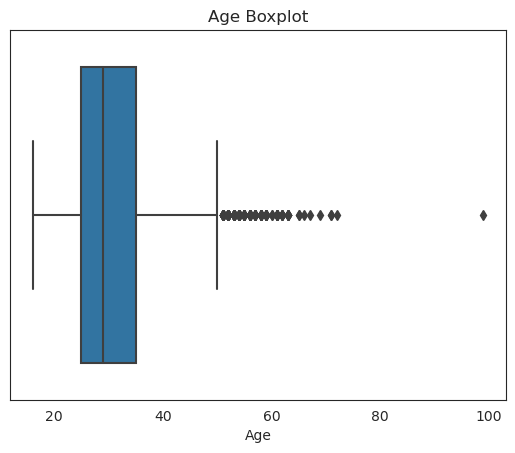

In [22]:
# Plotting the boxplot for the Age column 
sns.set_style(style="white")
sns.boxplot(x=df["Age"])
plt.title("Age Boxplot")
plt.show() 

In [23]:
# Determining the boxplot first quartile, third quartile and interquartile range for the Age column
quartile_1 = df['Age'].quantile(0.25)
quartile_3 = df['Age'].quantile(0.75)
interquartile_range = quartile_3 - quartile_1

# Determining the number of outliers beyond the first quartile for the Age column
outlier_below_quartile_1 = (df['Age']<quartile_1)
outlier_below_quartile_1.value_counts()

False    9302
True     2096
Name: Age, dtype: int64

In [24]:
# Determining the boxplot lower bound for the Age column
lower_bound = quartile_1 - (1.5*interquartile_range)

# Determining the number of outliers beyond the first quartile for the Age column
outlier_below_lower_bound = (df['Age']<lower_bound)
outlier_below_lower_bound.value_counts()

False    11398
Name: Age, dtype: int64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [25]:
# Computing the correlation between Age and all other numerical columns
df_numeric = df.select_dtypes(include=np.number)
corr_matrix = df_numeric.corr()
print(corr_matrix["Age"].sort_values(ascending=False))

Age              1.000000
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CompTotal        0.006970
Respondent       0.004041
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
